In [30]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, data, segmentation
from sklearn.cluster import KMeans
from skimage.color import label2rgb
from skimage import io, data, img_as_ubyte
from skimage.color import rgb2hsv, rgb2lab
from sklearn.cluster import Birch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import OPTICS
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.feature_extraction.image import grid_to_graph
from sklearn.cluster import MeanShift, estimate_bandwidth
from skimage.future import graph
from skimage.morphology import disk
from skimage.segmentation import watershed
from skimage.filters import rank
from scipy import ndimage as ndi

# K-means - gray image

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  


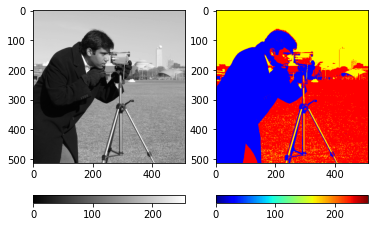

In [4]:
im = data.camera()
v = np.float32(im.reshape(-1, 1))

model = KMeans(n_clusters=3, random_state=0)
labels = model.fit_predict(v)
im_labels = labels.reshape(im.shape)
im_labels = img_as_ubyte(label2rgb(im_labels))

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
p = plt.imshow(im, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

ax = fig.add_subplot(1, 2, 2)
p = plt.imshow(im_labels, cmap='jet')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  


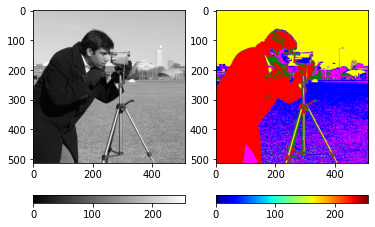

In [5]:
im = data.camera()
v = np.float32(im.reshape(-1, 1))

model = KMeans(n_clusters=5, random_state=0)
labels = model.fit_predict(v)
im_labels = labels.reshape(im.shape)
im_labels = img_as_ubyte(label2rgb(im_labels))

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
p = plt.imshow(im, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

ax = fig.add_subplot(1, 2, 2)
p = plt.imshow(im_labels, cmap='jet')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

# K-means - rgb image

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  


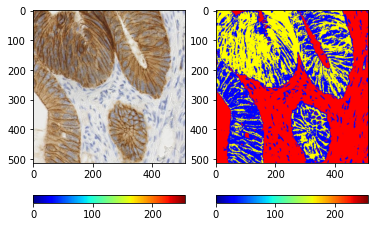

In [6]:
im = data.immunohistochemistry()
v = np.float32(np.column_stack([im[:,:,0].flatten(), im[:,:,1].flatten(), im[:,:,2].flatten()]))

model = KMeans(n_clusters=3, random_state=0)
labels = model.fit_predict(v)
im_labels = labels.reshape((im.shape[0], im.shape[1]))
im_labels = img_as_ubyte(label2rgb(im_labels))

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
p = plt.imshow(im, cmap='jet')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

ax = fig.add_subplot(1, 2, 2)
p = plt.imshow(im_labels, cmap='jet')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  


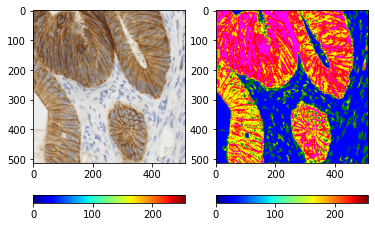

In [7]:
im = data.immunohistochemistry()
v = np.float32(np.column_stack([im[:,:,0].flatten(), im[:,:,1].flatten(), im[:,:,2].flatten()]))

model = KMeans(n_clusters=5, random_state=0)
labels = model.fit_predict(v)
im_labels = labels.reshape((im.shape[0], im.shape[1]))
im_labels = img_as_ubyte(label2rgb(im_labels))

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
p = plt.imshow(im, cmap='jet')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

ax = fig.add_subplot(1, 2, 2)
p = plt.imshow(im_labels, cmap='jet')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

# K-means - cielab image

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  import sys


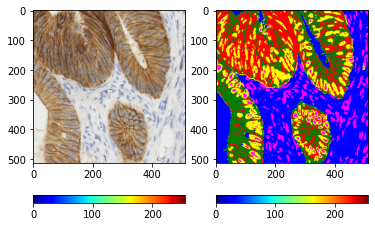

In [12]:
im = data.immunohistochemistry()
imlab = rgb2lab(im)
v = np.float32(np.column_stack([imlab[:,:,0].flatten(), imlab[:,:,1].flatten(), imlab[:,:,2].flatten()]))

model = KMeans(n_clusters=5, random_state=0)
labels = model.fit_predict(v)
im_labels = labels.reshape((im.shape[0], im.shape[1]))
im_labels = img_as_ubyte(label2rgb(im_labels))

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
p = plt.imshow(im, cmap='jet')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

ax = fig.add_subplot(1, 2, 2)
p = plt.imshow(im_labels, cmap='jet')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

# K-means - hsv image

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  import sys


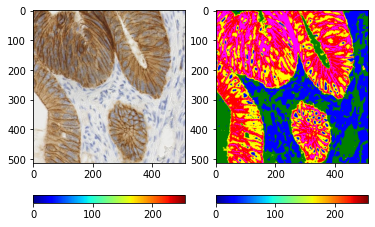

In [13]:
im = data.immunohistochemistry()
imhsv = rgb2hsv(im)
v = np.float32(np.column_stack([imhsv[:,:,0].flatten(), imhsv[:,:,1].flatten(), imhsv[:,:,2].flatten()]))

model = KMeans(n_clusters=5, random_state=0)
labels = model.fit_predict(v)
im_labels = labels.reshape((im.shape[0], im.shape[1]))
im_labels = img_as_ubyte(label2rgb(im_labels))

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
p = plt.imshow(im, cmap='jet')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

ax = fig.add_subplot(1, 2, 2)
p = plt.imshow(im_labels, cmap='jet')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

# Birch clustering - gray image

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  


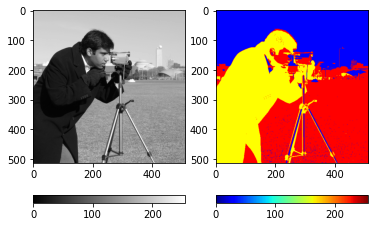

In [15]:
im = data.camera()
v = np.float32(im.reshape(-1, 1))

model = Birch(n_clusters=3, threshold=0.1)
labels = model.fit_predict(v)
im_labels = labels.reshape(im.shape)
im_labels = img_as_ubyte(label2rgb(im_labels))

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
p = plt.imshow(im, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

ax = fig.add_subplot(1, 2, 2)
p = plt.imshow(im_labels, cmap='jet')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

# Agglomerative clustering - gray image

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  import sys


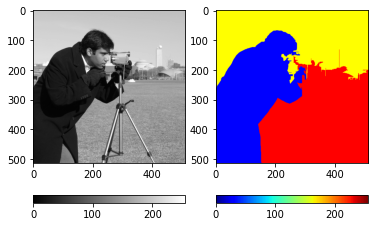

In [18]:
im = data.camera()
v = np.float32(im.reshape(-1, 1))

conn = grid_to_graph(*im.shape)
model = AgglomerativeClustering(n_clusters=3, linkage='ward', connectivity=conn)
labels = model.fit_predict(v)
im_labels = labels.reshape(im.shape)
im_labels = img_as_ubyte(label2rgb(im_labels))

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
p = plt.imshow(im, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

ax = fig.add_subplot(1, 2, 2)
p = plt.imshow(im_labels, cmap='jet')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

# Dbscan clustering - rgb image

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  


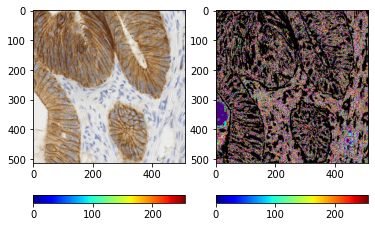

In [19]:
im = data.immunohistochemistry()
v = np.float32(im.reshape((-1, 3)))

model = DBSCAN(eps=0.3, min_samples=50)
labels = model.fit_predict(v[:,:2])
im_labels = labels.reshape(im.shape[:2])
im_labels = img_as_ubyte(label2rgb(im_labels))

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
p = plt.imshow(im, cmap='jet')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

ax = fig.add_subplot(1, 2, 2)
p = plt.imshow(im_labels, cmap='jet')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

  # Meanshift clustering - rgb image

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  


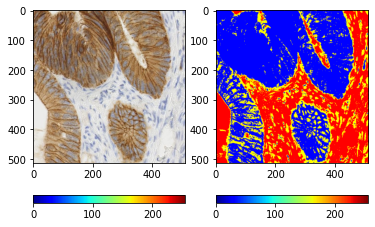

In [28]:
im = data.immunohistochemistry()
v = np.float32(im.reshape((-1, 3)))

bandwidth = estimate_bandwidth(v, quantile=.04, n_samples=1000)
model = MeanShift(bandwidth=bandwidth, bin_seeding=True)
labels = model.fit_predict(v)
im_labels = labels.reshape(im.shape[:2])
im_labels = img_as_ubyte(label2rgb(im_labels))

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
p = plt.imshow(im, cmap='jet')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

ax = fig.add_subplot(1, 2, 2)
p = plt.imshow(im_labels, cmap='jet')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

# Graph-cut clustering - rgb image

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  


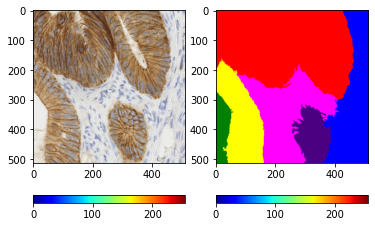

In [31]:
im = data.immunohistochemistry()
im_labels_1 = segmentation.slic(im, compactness=12, n_segments=30)

g = graph.rag_mean_color(im, im_labels_1, mode='similarity')
im_labels = graph.cut_normalized(im_labels_1, g)
im_labels = img_as_ubyte(label2rgb(im_labels))

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
p = plt.imshow(im, cmap='jet')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

ax = fig.add_subplot(1, 2, 2)
p = plt.imshow(im_labels, cmap='jet')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

# Watershead - gray image

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  


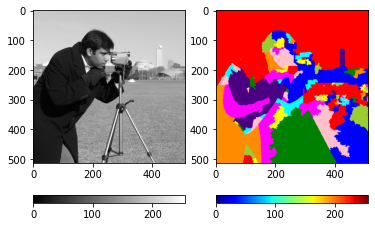

In [32]:
im = data.camera()

imd = rank.median(im, disk(2))
imm = rank.gradient(imd, disk(5)) < 10
imm = ndi.label(imm)[0]
img = rank.gradient(imd, disk(2))
im_labels = watershed(img, imm)
im_labels = img_as_ubyte(label2rgb(im_labels))

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
p = plt.imshow(im, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

ax = fig.add_subplot(1, 2, 2)
p = plt.imshow(im_labels, cmap='jet')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)